<a href="https://colab.research.google.com/github/Ramotso/Machine-Learning/blob/main/COS_711_Assignment_2_preproceccing_and_NN_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__>= "0.20"

import pandas as pd
import numpy as np
import os
np.random.seed(42)

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
assert tf.__version__>= "0.20"

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils as np_utils

from tensorflow.keras import layers

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import cv2

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

from google.colab import files
import io

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
uploaded = files.upload()

Saving merged1.csv to merged1.csv


In [ ]:
df_merge = pd.read_csv(io.BytesIO(uploaded['merged1.csv']))

In [ ]:
display(df_merge)

,Catalogue Nr,Species,GLl,GLm,Dl,Dm,Bd,Glpe,Bp,SD,...,Bp.1,SD.1,Bd.2,Glpe.1,Dp,DLS,Ld,MBS,HP,BFp
0,TSR9177,Goat,24.6,23.2,13.0,13.2,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TSR312/01,Goat,26.2,23.2,13.6,13.7,16.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TSR312/02,Goat,23.9,22.1,13.2,12.9,15.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MNR04/289/35,Goat,25.8,23.6,13.8,13.9,16.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MAP2020,Goat,27.9,25.7,14.8,15.4,18.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,TPD4053/02,Sheep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.8,21.9,6.2,15.2,8.2
156,MAP1630,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,34.0,26.1,6.4,0.0,0.0
157,MAP3385,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.8,21.1,6.1,0.0,0.0
158,MAP3386,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.1,23.8,7.4,0.0,0.0


In [ ]:
df_merge = df_merge.reindex(np.random.permutation(df_merge.index))
df_merge.reset_index(inplace=True, drop=True)

In [ ]:
df_merge = df_merge.drop(['Catalogue Nr'], axis=1)

In [ ]:
display(df_merge)

,Species,GLl,GLm,Dl,Dm,Bd,Glpe,Bp,SD,Bd.1,...,Bp.1,SD.1,Bd.2,Glpe.1,Dp,DLS,Ld,MBS,HP,BFp
0,Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.9,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,9.7,10.1,21.5,0.0,0.0,0.0,0.0,0.0,0.0
2,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Sheep,0.0,0.0,0.0,0.0,0.0,35.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.9,10.2,10.3,23.5,0.0,0.0,0.0,0.0,0.0,0.0
157,Sheep,29.7,28.8,17.6,17.4,20.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,Sheep/Goat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.9,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np


def clean_dataset(df_merge):
    assert isinstance(df_merge, pd.DataFrame), "df needs to be a pd.DataFrame"
    df_merge.dropna(inplace=True)
    indices_to_keep = ~df_merge.isin([np.nan, np.inf, -np.inf]).any(1)
    return df_merge[indices_to_keep].astype(np.float64)

In [ ]:
Y_col = 'Species '
X_cols = df_merge.loc[:, df_merge.columns != Y_col].columns

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_merge[X_cols], df_merge[Y_col],test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.fillna(0)
display(X_train)

,GLl,GLm,Dl,Dm,Bd,Glpe,Bp,SD,Bd.1,GL,...,Bp.1,SD.1,Bd.2,Glpe.1,Dp,DLS,Ld,MBS,HP,BFp
60,27.9,25.7,14.8,15.4,18.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,34.5,10.6,8.2,10.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.1,6.1,6.9,22.5,0.0,0.0,0.0,0.0,0.0,0.0
45,24.3,21.4,13.0,12.9,15.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.4,8.0,9.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,42.5,14.2,11.3,13.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,29.3,30.0,18.1,17.7,19.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.3,8.3,8.6,23.0,12.4,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
X_train_norm = normalize.fit_transform(X_train)

In [ ]:
X_test_norm = normalize.fit_transform(X_test)

In [ ]:
display(X_train_norm)

array([[0.88853503, 0.83441558, 0.79569892, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93312102, 0.97402597, 0.97311828, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

mlp.fit(X_train_norm,y_train)


predict_train = mlp.predict(X_train_norm)

predict_test = mlp.predict(X_test_norm)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,predict_train))

print(classification_report(y_train,predict_train))

[[34 13  3]
 [19 30  2]
 [ 6  3 18]]
              precision    recall  f1-score   support

        Goat       0.58      0.68      0.62        50
       Sheep       0.65      0.59      0.62        51
  Sheep/Goat       0.78      0.67      0.72        27

    accuracy                           0.64       128
   macro avg       0.67      0.64      0.65       128
weighted avg       0.65      0.64      0.64       128



In [ ]:
X_train_norm.shape


(128, 21)

In [ ]:
mlp_1 = MLPClassifier(max_iter=1500)


In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (8,8,8), (10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_1, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_norm, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1500), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(5, 5, 5), (8, 8, 8), (10, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.524 (+/-0.203) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'solver': 'sgd'}
0.571 (+/-0.153) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'solver': 'adam'}
0.555 (+/-0.127) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.571 (+/-0.149) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.493 (+/-0.150) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8), 'learning_rate': 'constant', 'solver': 'sgd'}
0.563 (+/-0.147) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8), 'learning_rate': 'constant', 'solver': 'adam'}
0.493 (+/-0.12

In [ ]:
mlp_tanh = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=500, alpha = 0.001)

#mlp_tanh.fit(X_train_norm,y_train)

In [ ]:
mlp_relu = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, alpha = 0.001)

#mlp_relu.fit(X_train_norm,y_train)

In [ ]:
mlp_sgd = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='sgd', max_iter=500, alpha = 0.001)

#mlp_sgd.fit(X_train_norm,y_train)

MLP_tanh Mean Accuracy: 0.541 (0.136)
SGD Mean Accuracy: 0.481 (0.138)


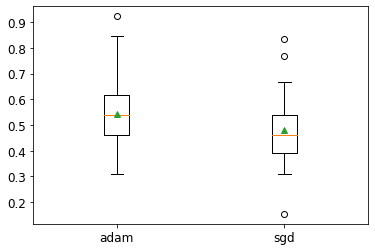

In [ ]:
# compare logistic regression and lda for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot

# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = mlp_tanh
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train_norm, y_train, scoring='accuracy', cv=cv1, n_jobs=-1)
print('MLP_tanh Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = mlp_sgd
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train_norm, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)
print('SGD Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['adam', 'sgd'], showmeans=True)
pyplot.show()

#t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X_train_norm, y=y_train, scoring='accuracy', random_seed=1)
# summarize
#print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
#if p <= 0.05:
#	print('Difference between mean performance is probably real')
#else:
#	print('Algorithms probably have the same performance')

MLP_ADAM Mean Accuracy: 0.557 (0.132)
MLP_SGD Mean Accuracy: 0.542 (0.119)


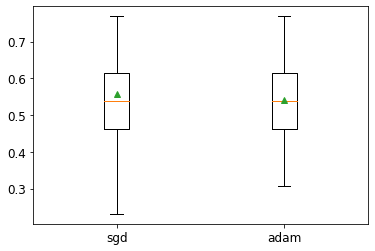

In [ ]:

#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = mlp_tanh
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train_norm, y_train, scoring='accuracy', cv=cv1, n_jobs=-1)
print('MLP_ADAM Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = mlp_relu
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train_norm, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)
print('MLP_SGD Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['sgd', 'adam'], showmeans=True)
pyplot.show()

In [ ]:
mlp_best_params = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, alpha = 0.001)



MLP_Original Mean Accuracy: 0.539 (0.119)
MLP_Best Params Mean Accuracy: 0.572 (0.121)


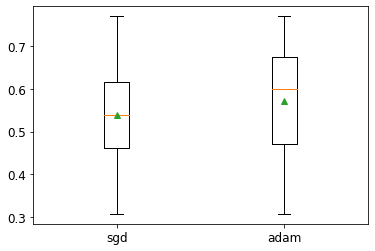

In [ ]:

#X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# evaluate model 1
model1 = mlp
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train_norm, y_train, scoring='accuracy', cv=cv1, n_jobs=-1)
print('MLP_Original Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = mlp_best_params
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)
print('MLP_Best Params Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['sgd', 'adam'], showmeans=True)
pyplot.show()

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_train_labeled=le.fit_transform(y_train)
y_test_labeled = le.fit_transform(y_test)
print(y_train_labeled)


[0 1 2 1 2 1 0 1 2 1 2 2 1 0 1 1 0 2 2 1 0 1 2 0 2 0 2 1 2 0 0 1 0 0 1 0 0
 0 0 1 1 0 1 1 1 1 1 0 0 1 2 1 0 1 2 1 1 1 0 0 0 2 1 1 2 2 2 1 1 1 0 0 1 1
 0 0 1 0 2 1 0 0 2 2 0 0 0 2 0 0 2 2 0 0 1 0 1 0 1 0 2 0 1 1 0 1 1 1 1 1 0
 2 0 0 0 0 0 0 0 2 1 2 1 0 1 1 1 1]


In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train_labeled)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_labeled, y_pred))


Accuracy: 0.6875


In [ ]:
parameters = {"n_neighbors": range(1, 8),
              "algorithm" :['ball_tree', 'kd_tree'],
              "p" :[1,2]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train_labeled)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': range(1, 8), 'p': [1, 2]})

In [ ]:
# Best paramete set
print('Best parameters found:\n', gridsearch.best_params_)

# All results
means = gridsearch.cv_results_['mean_test_score']
stds = gridsearch.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridsearch.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2}
0.533 (+/-0.265) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1}
0.541 (+/-0.291) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2}
0.539 (+/-0.202) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1}
0.524 (+/-0.212) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2}
0.571 (+/-0.273) for {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}
0.571 (+/-0.201) for {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2}
0.570 (+/-0.148) for {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1}
0.562 (+/-0.090) for {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2}
0.562 (+/-0.173) for {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1}
0.585 (+/-0.180) for {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2}
0.570 (+/-0.163) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}
0.554 (+/-0.173) for {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 2}
0.554 (+/-0.220) for {'algorithm': 

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn_five_neighbours = KNeighborsClassifier(n_neighbors=5, p=2, algorithm = 'ball_tree')
knn_three_neigbours = KNeighborsClassifier(n_neighbors=3, p=2, algorithm = 'ball_tree')
knn_kd_tree = KNeighborsClassifier(n_neighbors=5, p=2, algorithm = 'kd_tree')


#Train the model using the training sets
#knn.fit(X_train, y_train_labeled)

#Predict the response for test dataset
#y_pred = knn.predict(X_test)


KNN_5 Mean Accuracy: 0.578 (0.117)
KNN_3 Mean Accuracy: 0.552 (0.112)


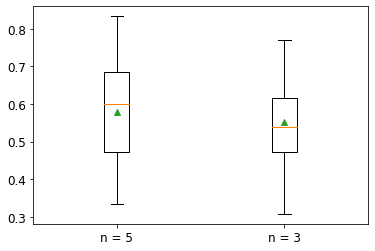

In [ ]:
model1 = knn_five_neighbours
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train, y_train_labeled, scoring='accuracy', cv=cv1, n_jobs=-1)
print('KNN_5 Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = knn_three_neigbours
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train, y_train_labeled, scoring='accuracy', cv=cv2, n_jobs=-1)
print('KNN_3 Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['n = 5', 'n = 3'], showmeans=True)
pyplot.show()

In [ ]:
model1 = knn_five_neighbours
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train, y_train_labeled, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Ball Tree Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = knn_kd_tree
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train, y_train_labeled, scoring='accuracy', cv=cv2, n_jobs=-1)
print('TD Tree Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['Ball_tree', 'TD Tree'], showmeans=True)
pyplot.show()

In [ ]:
knn_optimized = KNeighborsClassifier(n_neighbors=5)


In [ ]:
model1 = knn_optimized
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train, y_train_labeled, scoring='accuracy', cv=cv1, n_jobs=-1)
print('KNN_5 Optimised Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = mlp
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train_norm, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)
print('MLP Optimised Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['KNN 5 Optimised', 'MLP Optimised'], showmeans=True)
pyplot.show()

In [ ]:
# Load libraries
#import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_DT = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_DT.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
para_dict = {
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
 }

In [ ]:
grid = GridSearchCV(clf_DT, 
                    param_grid = para_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train,y_train)

In [ ]:
# Best paramete set
print('Best parameters found:\n', grid.best_params_)

# All results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
model1 = clf_DT
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Decision tree Optimised Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = mlp
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train_norm, y_train, scoring='accuracy', cv=cv2, n_jobs=-1)
print('MLP Optimised Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['KNN 5 Optimised', 'MLP Optimised'], showmeans=True)
pyplot.show()

In [ ]:
# Create Decision Tree classifer object
clf_Depth_Seven = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 3, min_samples_split = 9)
clf_Depth_five = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 3, min_samples_split = 9)
clf_min_split_ten = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 3, min_samples_split = 10)

# Train Decision Tree Classifer
#clf_DT = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf_DT.predict(X_test)


In [ ]:
model1 = clf_Depth_Seven
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X_train, y_train_labeled, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Decision Tree D_7 Mean Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

# evaluate model 2
model2 = clf_Depth_five
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X_train, y_train_labeled, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Decision Tree D = 5 Mean Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# plot the results
pyplot.boxplot([scores1, scores2], labels=['Ball_tree', 'TD Tree'], showmeans=True)
pyplot.show()